In [1]:
import datetime
begin = datetime.datetime.now()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input
from keras import optimizers, regularizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn import preprocessing
import mysql.connector

#Data Import
conn = mysql.connector.connect(user='root', password='Kunwar_IIT13',
                               host='127.0.0.1',
                               database='database_schema')
cursor = conn.cursor()
query = 'select * from ml_temp'
results = pd.read_sql_query(query, conn)
results.to_csv("ml_temp1.csv", index=False)
data = pd.read_csv('ml_temp1.csv')
user_id = data["userid"]

#remove unnecessary variables
df = data.drop(['userid'], axis = 1)
list_of_column_names = list(df.columns)


In [2]:
#Encode categorical data to ONE-HOT
categorical_data = ['gender']
df = pd.get_dummies(df, columns = categorical_data)

In [3]:
#Scale the data to [0,1] range
columns_to_scale = list_of_column_names
df2 = pd.DataFrame(np.random.randint(12,1000,size= (len(user_id), 199)), columns = list_of_column_names)
df2[columns_to_scale]=df2[columns_to_scale].apply(lambda x: (x-x.min())/(x.max()-x.min()))


In [4]:
#Split in 75% train and 25% test set
X = df2.iloc[:, :]
X_train, X_test, y_train, y_test = train_test_split(X, X, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(945, 199) (237, 199) (945, 199) (237, 199)


In [5]:
# reduce to 32 features
encoding_dim = 32

input_df = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_df)
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

# encoder
autoencoder = Model(input_df, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Epoch 1/200
10/10 [==============================] - 1s 69ms/step - loss: 0.0408 - val_loss: 0.0398
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0397
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0396 - val_loss: 0.0396
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0396 - val_loss: 0.0396
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0395 - val_loss: 0.0395
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0394 - val_loss: 0.0394
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0392 - val_loss: 0.0393
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0392 - val_loss: 0.0393
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0391 - val_loss: 0.0391
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0389 - val_loss: 0.0390
Epoch 11

Epoch 83/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0321 - val_loss: 0.0346
Epoch 84/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0320 - val_loss: 0.0346
Epoch 85/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0347
Epoch 86/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0346
Epoch 87/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0347
Epoch 88/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0320 - val_loss: 0.0346
Epoch 89/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0346
Epoch 90/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0320 - val_loss: 0.0346
Epoch 91/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0346
Epoch 92/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0318 - val_loss: 0.0346

10/10 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.0344
Epoch 165/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.0344
Epoch 166/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.0344
Epoch 167/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.0344
Epoch 168/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0308 - val_loss: 0.0344
Epoch 169/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.0344
Epoch 170/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.0344
Epoch 171/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.0344
Epoch 172/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.0344
Epoch 173/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.0344
Epoc

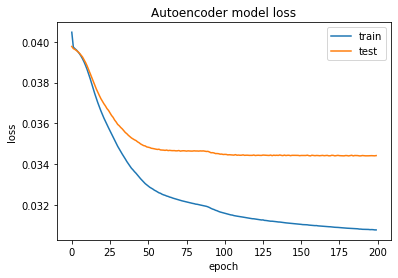

In [6]:
autoencoder_model = autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=100,
                shuffle=True,
                validation_data=(X_test, X_test))

# Summarize history for loss
plt.figure()
plt.plot(autoencoder_model.history['loss'])
plt.plot(autoencoder_model.history['val_loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [7]:
encoder = Model(input_df, encoded)
encoded_x = encoder.predict(X)
new_table = []
for i in range(len(encoded_x)):
    new_table.append([(user_id[i]), str(encoded_x[i])])

In [8]:
# import mysql.connector
# from mysql.connector import errorcode
#
# try:
#     cnx = mysql.connector.connect(user='root', password='Kunwar_IIT13',
#                                  host='127.0.0.1',
#                                  database='database_schema')
# except mysql.connector.Error as err:
#     if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
#         print("Something is wrong with your user name or password")
#     elif err.errno == errorcode.ER_BAD_DB_ERROR:
#         print("Database does not exist")
#     else:
#         print(err)
# else:
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS embeddings_table")
cursor.execute("CREATE TABLE `embeddings_table` ("
"  `User_id` int NOT NULL, `Embeddings` VARCHAR(1000))")
for i in range(len(new_table)):
    # print(new_table[i][0], new_table[i][1])
#         data = (new_table[i][0] , str(new_table[i][1]))
#         print(data)
    insert_query = "INSERT INTO embeddings_table (User_id, Embeddings) VALUES (%s, %s)"
    cursor.execute(insert_query, (int(new_table[i][0]), str(new_table[i][1])))
conn.commit()
    
print(datetime.datetime.now() - begin)

0:00:18.566746
